In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:

N = 5
grid = np.array([np.array([x/N for y in range(N)]) for x in range(N)])
print(grid)

[[0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8]]


In [51]:
def sink_check(sinks, x, y):
    if sinks == []:
        return False
    if (x,y) in sinks:
            return True
    return False


def new_growth_candidates(new_clusteree, growth_candidates, N):
    
    if new_clusteree not in growth_candidates:
        raise 'Oi kan niet'
    
    growth_candidates.remove(new_clusteree)
    if new_clusteree[0] != 0:
        if (new_clusteree[0]-1,new_clusteree[1]) not in growth_candidates:
            growth_candidates.append((new_clusteree[0]-1,new_clusteree[1]))
    if new_clusteree[0] != N-1:
        if (new_clusteree[0]+1,new_clusteree[1]) not in growth_candidates:
            growth_candidates.append((new_clusteree[0]+1,new_clusteree[1]))
    if new_clusteree[1] != 0:
        if (new_clusteree[0],new_clusteree[1]-1) not in growth_candidates:
            growth_candidates.append((new_clusteree[0],new_clusteree[1]-1))
    if new_clusteree[1] != N-1:
        if (new_clusteree[0],new_clusteree[1]+1) not in growth_candidates:
            growth_candidates.append((new_clusteree[0],new_clusteree[1]+1))
        
    return growth_candidates


def successive_over_relaxation(grid, cluster, omega = 1):
    counter = 0
    delta = 1

    while delta > 1e-5 and delta < 1e5 and counter < 1e4:
        new_grid = grid.copy()
        new_grid[-1] = 1
        for y in range(1, N-1):
            new_grid[y][0] = 0.25 * omega * (grid[y + 1][0] + grid[y - 1][0] + grid[y][1] + grid[y][-1]) + (1 - omega) * grid[y][0] if (y,0) not in cluster else 0
            for x in range(1, N-1):
                new_grid[y][x] = (1 - omega) * grid[y][x] + omega * 0.25 * (grid[y + 1][x] + new_grid[y - 1][x] + grid[y][x + 1] + new_grid[y][x - 1]) if (y,x) not in cluster else 0
            new_grid[y][-1] = 0.25 * omega * (grid[y + 1][-1] + new_grid[y - 1][-1] + grid[y][-2] + new_grid[y][0]) + (1 - omega) * grid[y][-1] if (y,N-1) not in cluster else 0
        
        delta = max(abs(new_grid - grid).flatten())

        grid = new_grid.copy()

        counter += 1
    
    return grid

        # growth_chance = []
        # for coord in growth_candidates:
        #     growth_chance.append(grid[coord[0]][coord[1]])

    
        # if all(x == growth_chance[0] for x in growth_chance) and growth_chance[0] == 0.0:
        #     for index in range(len(growth_chance)):
        #         growth_chance[index] = 1


        # sum_chance = 0
        # for x in growth_chance:
        #     sum_chance += x ** eta

        # growth_chance_norm = [float(x**eta)/sum_chance for x in growth_chance]

        
        # new_growth_index = np.random.choice(np.arange(len(growth_candidates)), 1, p=growth_chance_norm)
        # cluster.append(growth_candidates[new_growth_index[0]])
        # growth_candidates = new_growth_candidates(growth_candidates[new_growth_index[0]], growth_candidates, N)

        # grid_list.append(grid.copy())

In [52]:
def find_neighbors(cluster, N):
    neighbors = set([])

    for coord in cluster:
        if coord[0] != 0:
            neighbors.add((coord[0]-1,coord[1]))
        if coord[0] != N-1:
            neighbors.add((coord[0]+1,coord[1]))
        if coord[1] != 0:
            neighbors.add((coord[0],coord[1]-1))
        if coord[1] != N-1:
            neighbors.add((coord[0],coord[1]+1))

    for coord in cluster:
        if coord in neighbors:
            neighbors.remove(coord)

    return neighbors


In [56]:
N = 50
growth_steps = 100
eta = 1

grid = np.zeros((N,N))
grid = np.array([np.array([x/N for y in range(N)]) for x in range(N)])

cluster = [(0, N // 2)]

for t in range(growth_steps):
    print(f"t = {t}", end='\r')

    grid = successive_over_relaxation(grid, cluster)

    probability_sum = 0
    probability_list = []

    growth_candidates = list(find_neighbors(cluster, N))
    for coord in growth_candidates:
        probability_sum += grid[coord[0]][coord[1]] ** eta
        probability_list.append(grid[coord[0]][coord[1]] ** eta)

    probability_list = [x / probability_sum for x in probability_list]

    new_coords = np.random.choice(range(len(growth_candidates)), 1, p=probability_list)[0]
    cluster.append(growth_candidates[new_coords])


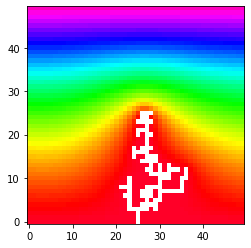

In [57]:
for coord in cluster:
    grid[coord[0]][coord[1]] = None

plt.imshow(grid, origin='lower', cmap='gist_rainbow')